<a href="https://colab.research.google.com/github/christopherfegalan/CPE031_Visualization_and_Data_Analysis/blob/main/HoA6_Fegalan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hands-On Activity 6 | Data Analysis**


---



Name : Fegalan, Christopher T.<br>
Course Code and Title : CPE031 - Visualizations and Data Analysis<br>
Date Submitted : 09/11/2025<br>
Instructor : Mrs. Maria Rizette Sayo


---



In [ ]:
!pip install pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CPE031_FEGALAN/HoA6/SampleData.csv')

print(df)

   OrderDate   Region       Rep     Item  Units  Unit Cost       Total
0     1/6/21     East     Jones   Pencil     95       1.99     189.05 
1    1/23/21  Central    Kivell   Binder     50      19.99     999.50 
2     2/9/21  Central   Jardine   Pencil     36       4.99     179.64 
3    2/26/21  Central      Gill      Pen     27      19.99     539.73 
4    3/15/21     West   Sorvino   Pencil     56       2.99     167.44 
5     4/1/21     East     Jones   Binder     60       4.99     299.40 
6    4/18/21  Central   Andrews   Pencil     75       1.99     149.25 
7     5/5/21  Central   Jardine   Pencil     90       4.99     449.10 
8    5/22/21     West  Thompson   Pencil     32       1.99      63.68 
9     6/8/21     East     Jones   Binder     60       8.99     539.40 
10   6/25/21  Central    Morgan   Pencil     90       4.99     449.10 
11   7/12/21     East    Howard   Binder     29       1.99      57.71 
12   7/29/21     East    Parent   Binder     81      19.99   1,619.19 
13   8

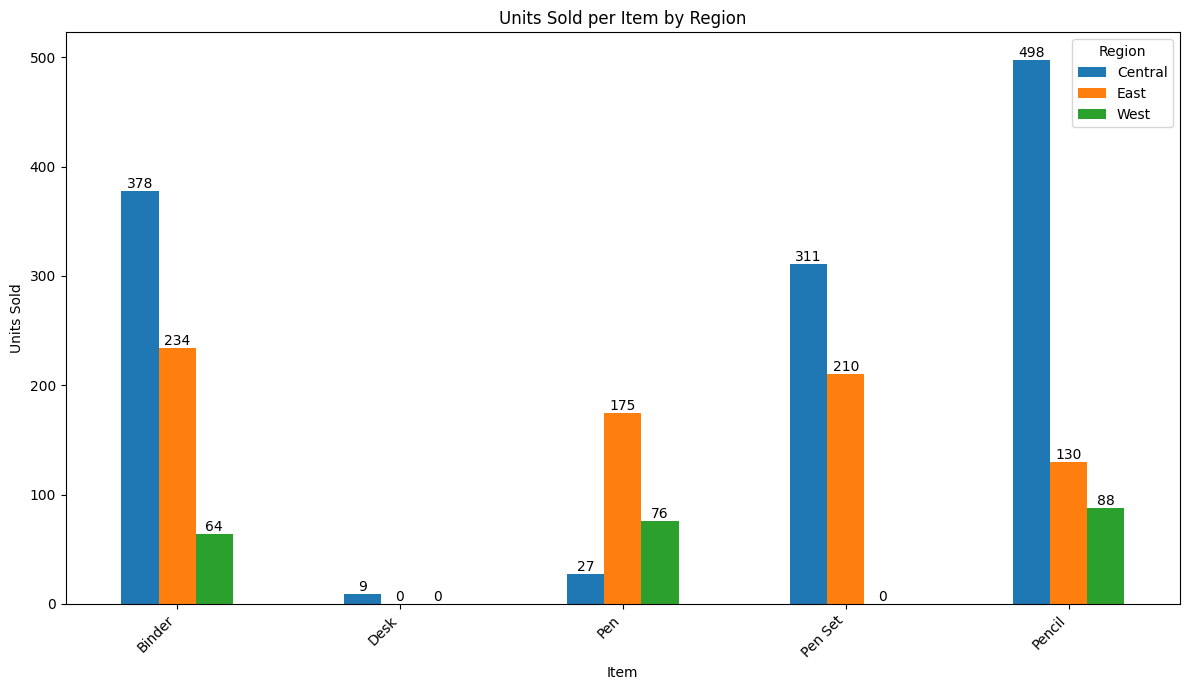

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


region_item_units = df.groupby(['Region', 'Item'])['Units'].sum().reset_index()

pivot_df = region_item_units.pivot(index='Item', columns='Region', values='Units').fillna(0)


ax = pivot_df.plot(kind='bar', figsize=(12, 7))
plt.title('Units Sold per Item by Region')
plt.xlabel('Item')
plt.ylabel('Units Sold')
plt.xticks(rotation=45, ha='right')


plt.legend(title='Region')


for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()

In [ ]:
display(region_item_units)

,Region,Item,Units
0,Central,Binder,378
1,Central,Desk,9
2,Central,Pen,27
3,Central,Pen Set,311
4,Central,Pencil,498
5,East,Binder,234
6,East,Pen,175
7,East,Pen Set,210
8,East,Pencil,130
9,West,Binder,64


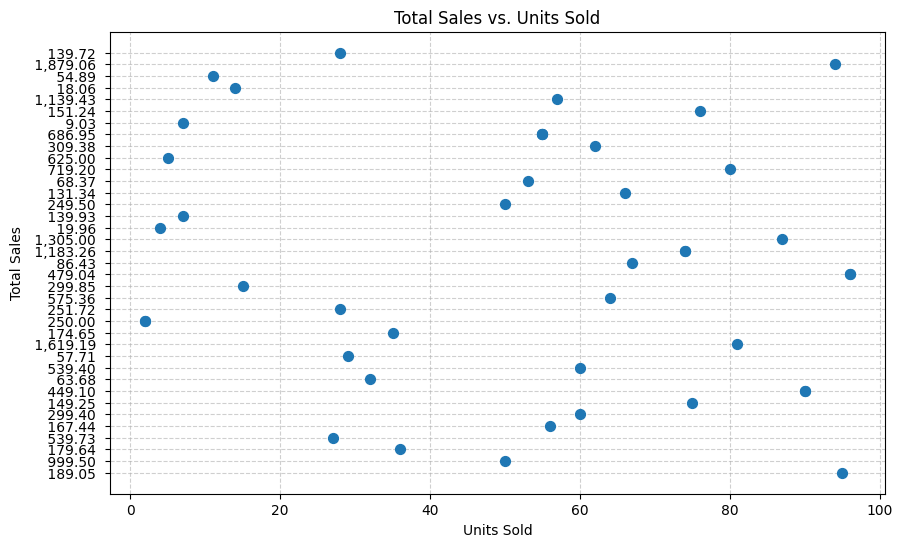

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Units'], df['Total'], s=50, zorder=2)
plt.title('Total Sales vs. Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='--', alpha=0.6, zorder=1)
plt.show()

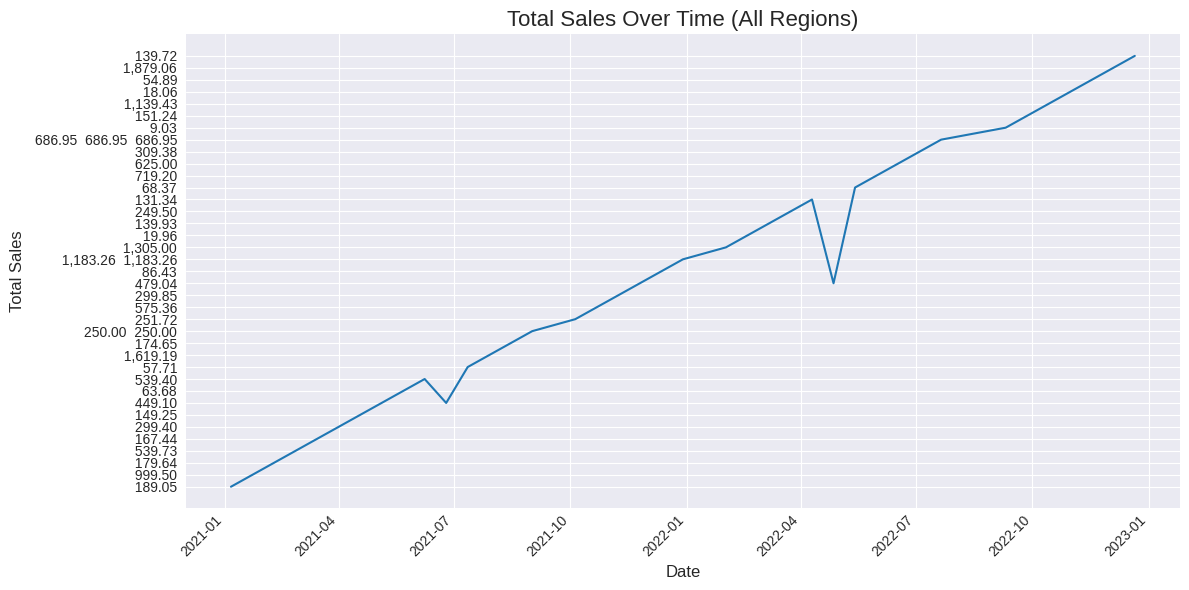

In [40]:
try:
    df['OrderDate'] = pd.to_datetime(df['OrderDate'], format='%m/%d/%y')
except ValueError:
    df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')


daily_total_sales = df.groupby('OrderDate')['Total'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_total_sales['OrderDate'], daily_total_sales['Total'])
plt.title('Total Sales Over Time (All Regions)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()